In [5]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import math

In [63]:
data = pd.read_csv("R_static_O5_150_0.csv")
data_n = data.drop(columns=["Tracker", "ID"])

In [64]:
data_n.head(100)

,X,Y,Z,Timestamp,X_real,Y_real
0,3.574,4.675,1.5,2024-05-17T19:22:59.837917Z,3.5,4.5
1,3.562,4.677,1.5,2024-05-17T19:23:00.090186Z,3.5,4.5
2,3.558,4.673,1.5,2024-05-17T19:23:00.332572Z,3.5,4.5
3,3.562,4.676,1.5,2024-05-17T19:23:00.618665Z,3.5,4.5
4,3.559,4.682,1.5,2024-05-17T19:23:00.866224Z,3.5,4.5
5,3.554,4.671,1.5,2024-05-17T19:23:01.113981Z,3.5,4.5
6,3.549,4.666,1.5,2024-05-17T19:23:01.359920Z,3.5,4.5
7,3.556,4.679,1.5,2024-05-17T19:23:01.608447Z,3.5,4.5
8,3.550,4.675,1.5,2024-05-17T19:23:01.896391Z,3.5,4.5
9,3.556,4.664,1.5,2024-05-17T19:23:02.143129Z,3.5,4.5


In [66]:
def exclusivity_radius_filter(data, r):
    corrected_data = []
    columns_ = ['X', 'Y']
    for i in range(data.shape[0]):
        if i > 10:
            if math.sqrt(data['X'][i]**2 + data['Y'][i]**2) > r:
                corrected_data.append([data['X'][i-1], data['Y'][i-1]])
            else:
                corrected_data.append([data['X'][i], data['Y'][i]])
        else:
            corrected_data.append([data['X'][i], data['Y'][i]])
    data_c = pd.DataFrame(corrected_data, columns = columns_)
    return data_c

In [67]:
exclusivity_radius_filter(data_n, 0.01).head(100)

,X,Y
0,3.574,4.675
1,3.562,4.677
2,3.558,4.673
3,3.562,4.676
4,3.559,4.682
5,3.554,4.671
6,3.549,4.666
7,3.556,4.679
8,3.550,4.675
9,3.556,4.664


### EMS

ems = Somme(i,n)( (pos - pos_r)^2) = somme(i,n)((x_i -x_r_i)^2 + (y_i + y_r_i)^2)

In [46]:
def mean_square_error(data, data_r):
    if(data.shape[0] != data_r.shape[0]):
        print("df don't have same format (mean_square_error)")
        return
    som = 0
    for i in range(data.shape[0]):
        som += (data['X_real'][i] - data_r['X'][i])**2 + (data['Y_real'][i] - data_r['Y'][i])**2
    return som

In [68]:
print(mean_square_error(data_n, exclusivity_radius_filter(data_n, 1)))

52.320135000000015


# hyper parameter R ( exclusivity radius ) reasearch

Problem : In dynamic : If the radius is too small, chances are the filter fall into a pit and cannot move out because every new values are too far away. This can be seen when the precision become extremely bad 

In [69]:
Radius = np.linspace(3, 6,100)
Precision = []

for r in Radius:
    Precision.append(mean_square_error(data_n, exclusivity_radius_filter(data_n, r)))

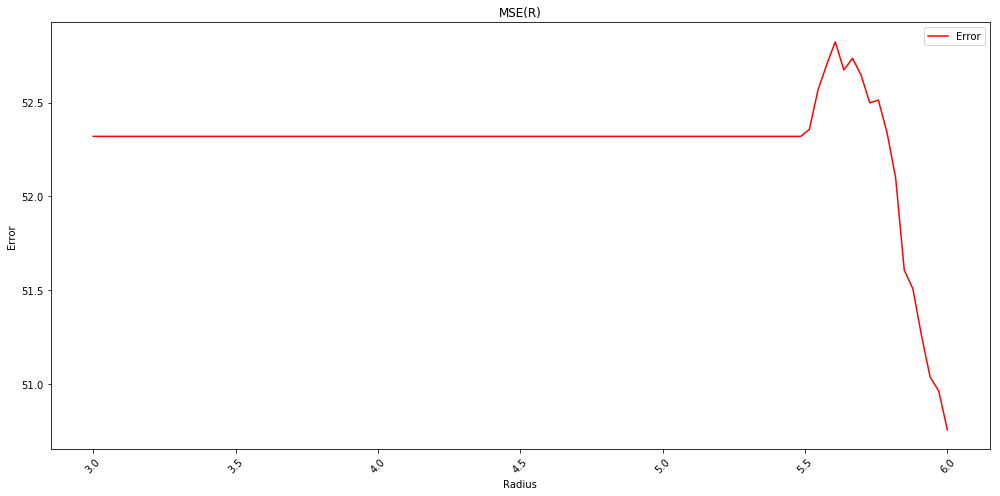

In [70]:
plt.figure(figsize=(14, 7))
plt.plot(Radius, Precision, 'r-', label='Error')

plt.xlabel('Radius')
plt.ylabel('Error')
plt.legend()
plt.title('MSE(R)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()